# Proyek Analisis Data: [Bike Sharaing Dataset]
- **Nama:** [Darojatul Alya Anwar]
- **Email:** [mc227d5x2095@student.devacademy.id]
- **ID Dicoding:** [MC227D5X2095]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari pada hari kerja dibandingkan dengan akhir pekan?
- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mengimpor semua packages yang akan digunakan untuk projek ini

## Data Wrangling

### Gathering Data

In [ ]:
Hour_df= pd.read_csv('hour.csv')
Hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kode di atas akan menampilkan 5 baris pertama dari DataFrame Hour_df

In [ ]:
Day_df= pd.read_csv('day.csv')
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


 Kode diatas digunakan untuk membuat tabel day menjadi sebuah DataFrame, kode di atas juga akan menampilkan 5 baris pertama dari Dataframe tersebut.

### Assessing Data

In [ ]:
#Menilai Hour_df
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dataset ini berisi informasi peminjaman sepeda berdasarkan waktu, kondisi cuaca, dan tipe pengguna. Terdapat data numerik seperti suhu, kelembaban, serta jumlah peminjaman, serta data kategorikal seperti musim, hari kerja, dan kondisi cuaca.Dataset ini dapat digunakan untuk menganalisis pola peminjaman sepeda berdasarkan berbagai faktor. dteday masih bertipe object, sebaiknya dikonversi ke datetime agar lebih mudah dianalisis berdasarkan waktu.

In [ ]:
#Mengecek missing values
Hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Kode diatas digunakan untuk mengecek apakah ada missing values dalam dataset dengan menghitung jumlah nilai NaN di setiap kolom. Hasilnya 0 yang berarti tidak ada data yang hilang dalam dataset, sehingga tidak diperlukan proses imputasi atau penghapusan data.

In [ ]:
print("Jumlah duplikasi: ", Hour_df.duplicated().sum())

Jumlah duplikasi:  0


Hasil dari kode tersebut tidak menunjukkan duplikasi pada data Hour_df

In [ ]:
Hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kode di atas akan menampilkan ringkasan parameter statistik dari dataset

In [ ]:
#Menilai data Day_df
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dataset ini berisi informasi peminjaman sepeda berdasarkan hari. Informasi yang tersedia mencakup tanggal, musim, tahun, bulan, kondisi cuaca, serta jumlah pengguna terdaftar dan tidak terdaftar. Kolom cnt menunjukkan total peminjaman sepeda per hari, sehingga dataset ini dapat digunakan untuk menganalisis tren peminjaman sepeda berdasarkan faktor waktu dan kondisi lingkungan. Kolom dteday (tanggal) masih bertipe object (string). Sebaiknya dikonversi ke datetime agar lebih mudah dianalisis berdasarkan waktu.

In [ ]:
print("Jumlah duplikasi: ",Day_df.duplicated().sum())
Day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kode tersebut digunakan untuk menampilkan ringkasan dan data tersebut menunjukkan tidak terdapat duplikasi dan keanehan nilai pada Day_df.



### Cleaning Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  Hour_df[column] = pd.to_datetime(Hour_df[column])

Kode ini mengonversi kolom dteday dalam dataframe Hour_df ke tipe data datetime menggunakan pd.to_datetime(). Konversi ini mempermudah analisis berbasis waktu, seperti ekstraksi tahun, bulan, atau hari.

In [ ]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  Day_df[column] = pd.to_datetime(Day_df[column])

Kode ini mengonversi kolom dteday dalam dataframe Day_df ke tipe data datetime menggunakan pd.to_datetime(). Konversi ini mempermudah analisis berbasis waktu, seperti ekstraksi tahun, bulan, atau hari.

In [ ]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Eksplorasi Data Hour_df
Hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Tabel di atas merangkum statistik dataset dengan 17.379 entri. Kolom dteday mencakup data dari 1 Januari 2011 hingga 31 Desember 2012. Variabel season, yr, mnth, dan hr memiliki distribusi seimbang. Kolom holiday, weekday, dan workingday mencerminkan pola hari kerja dan libur. Parameter temp, atemp, hum, dan windspeed memiliki rentang logis. Rata-rata jumlah penyewaan sepeda (cnt) sekitar 189 per jam, dengan variasi signifikan, berkisar dari 1 hingga 977. Standar deviasi menunjukkan fluktuasi tinggi dalam jumlah penyewaan.

In [ ]:
Hour_df.groupby(by="season").agg({
    "instant": "nunique",  # Changed "Hour_id" to "instant"
    "yr": ["max", "min", "mean", "std"]  # Changed "age" to "yr"
})

instant  yr                        
       nunique max min      mean       std
season                                    
1         4242   1   0  0.512494  0.499903
2         4409   1   0  0.500340  0.500057
3         4496   1   0  0.501779  0.500052
4         4232   1   0  0.495747  0.500041

Kode di atas menghasilkan tabel ringkasan yang mengelompokkan data berdasarkan musim (season). Kolom instant dengan agregasi nunique menunjukkan jumlah entri unik dalam setiap musim. Sementara itu, kolom yr menampilkan nilai maksimum, minimum, rata-rata, dan standar deviasi dari tahun dalam setiap musim. Dari hasil yang diperoleh, jumlah data terdistribusi hampir merata di semua musim, dengan rata-rata nilai yr berkisar antara 0.49 hingga 0.51, yang menunjukkan bahwa data terbagi cukup seimbang antara dua tahun dalam dataset.

In [ ]:
#Total penyewaan sepeda per musim
Hour_df.groupby("season")["cnt"].sum().sort_values(ascending=False)

,cnt
season,
3,1061129
2,918589
4,841613
1,471348


Menampilkan total penyewaan sepeda di setiap musim, diurutkan dari yang terbanyak.

In [ ]:
#Total penyewaan sepeda per bulan
Hour_df.groupby("mnth")["cnt"].sum().sort_values(ascending=False)

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


 Menampilkan bulan dengan jumlah penyewaan sepeda terbanyak.

In [ ]:
#Total penyewaan sepeda per jam dalam sehari
Hour_df.groupby("hr")["cnt"].mean().sort_values(ascending=False)

,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


 Melihat jam berapa rata-rata penyewaan sepeda paling tinggi.

In [ ]:
#Total penyewaan sepeda per hari kerja vs hari libur
Hour_df.groupby("workingday")["cnt"].sum()

,cnt
workingday,
0,1000269
1,2292410



Membandingkan jumlah penyewaan sepeda antara hari kerja (1) dan hari libur (0).

In [ ]:
#Melihat rata-rata penyewaan sepeda berdasarkan musim dan jam:
Hour_df.pivot_table(values="cnt", index="season", columns="hr", aggfunc="mean")

hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
season,,,,,,,,,,,,,,,,,,,,,
1,27.404494,18.140449,12.794118,7.102564,3.181818,10.701754,40.792135,115.391061,235.167598,147.016760,...,147.805556,155.655556,182.314917,263.977901,239.500000,165.761111,117.838889,91.650000,69.111111,44.411111
2,56.842391,35.222826,23.380435,11.450549,6.211111,19.169399,79.070652,221.483696,380.135870,233.983696,...,265.777174,279.250000,346.907609,518.847826,483.173913,358.663043,256.983696,191.554348,146.114130,95.983696
3,73.914439,43.720430,30.731183,15.752688,8.240642,26.454545,101.315508,276.595745,421.297872,254.930851,...,282.234043,288.409574,369.765957,572.138298,547.219251,419.160428,312.860963,241.427807,184.042781,122.919786
4,56.333333,35.920455,23.765714,11.861272,7.267045,22.590909,81.681818,231.607955,396.346591,239.443182,...,266.011299,279.819209,346.903955,486.158192,426.146893,297.033898,212.141243,161.327684,123.564972,86.440678


Menampilkan rata-rata penyewaan sepeda untuk setiap jam dalam berbagai musim dengan pivot table

In [ ]:
#Eksplorasi Data Day_df
Day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dataset day_df berisi 731 hari dari 1 Januari 2011 hingga 31 Desember 2012 dengan rata-rata penyewaan sepeda harian sebanyak 4.504 unit, minimum 22 dan maksimum 8.714, menunjukkan variasi yang cukup besar (std 1.937). Lebih banyak hari kerja dibandingkan hari libur (workingday rata-rata 0.68, holiday hanya 2.8%). Suhu rata-rata 0.495, kelembaban 0.62, dan kecepatan angin 0.19, dengan mayoritas cuaca cerah atau berawan ringan. Distribusi musim cukup merata (rata-rata 2.5) dan dapat dianalisis lebih lanjut berdasarkan tren penyewaan dalam berbagai kondisi.

In [ ]:
Day_df.pivot_table(values="cnt", index="season", columns="workingday", aggfunc="mean")

workingday,0,1
season,,
1,2257.098361,2780.541667
2,5142.428571,4926.664062
3,5474.666667,5718.114504
4,4606.210526,4785.611570


Menampilkan rata-rata penyewaan sepeda pada hari kerja dan hari libur untuk setiap musim.

In [ ]:
Day_df.groupby("mnth")["cnt"].sum().sort_values(ascending=False)

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


Melihat bulan dengan penyewaan terbanyak.

In [ ]:
#Eksplorasi data Hour_df dan Day_df
hour_day_df = pd.merge(
    left=Hour_df,
    right=Day_df,
    how="left",  # Left join agar semua data dari hour_df tetap ada
    left_on="dteday",
    right_on="dteday"
)

hour_day_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [ ]:
hour_day_df.groupby(by="season_x").agg({
    "instant_x": "nunique",  # Jumlah observasi unik per musim
    "cnt_x": "sum",  # Total jumlah pengguna sepeda (hourly count)
    "cnt_y": "sum"  # Total jumlah pengguna sepeda (daily count)
}).reset_index()

,season_x,instant_x,cnt_x,cnt_y
0,1,4242,471348,11179147
1,2,4409,918589,22024071
2,3,4496,1061129,25420803
3,4,4232,841613,20167029


Menghasilkan jumlah penyewaan sepeda yang dikelompokkan berdasarkan musim.

In [ ]:
#Jumlah Peminjaman Berdasarkan Hari Kerja (Workingday) dan libur
hour_day_df.groupby(by="holiday_x").agg({
    "cnt_x": "sum",
    "cnt_y": "sum"
}).reset_index()

,holiday_x,cnt_x,cnt_y
0,0,3214244,76916020
1,1,78435,1875030


untuk melihat peminjaman lebih banyak di hari libur atau hari kerja?

In [ ]:
#Jumlah Penyewaan Berdasarkan Bulan
hour_day_df.groupby(by="mnth_x").agg({
    "cnt_x": "sum",
    "cnt_y": "sum"
}).reset_index()

,mnth_x,cnt_x,cnt_y
0,1,134933,3184341
1,2,151352,3582161
2,3,228920,5463600
3,4,269094,6444110
4,5,331686,7960464
5,6,346342,8312208
6,7,344948,8278752
7,8,351194,8391628
8,9,345991,8294519
9,10,322352,7719270


Melihat bulan mana yang memiliki peminjaman sepeda tertinggi.

In [ ]:
#Berdasarkan cuaca
hour_day_df.groupby(by="weathersit_x").agg({
    "cnt_x": "sum",
    "cnt_y": "sum"
}).reset_index()


,weathersit_x,cnt_x,cnt_y
0,1,2338173,54838014
1,2,795952,19311422
2,3,158331,4637431
3,4,223,4183


Mengetahui apakah orang lebih sering meminjam sepeda saat cuaca cerah dibanding hujan.



In [ ]:
all_df = pd.merge(
    left=Hour_df,
    right=Day_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Kode tersebut menggabungkan Hour_df dan Day_df menggunakan left join berdasarkan dteday, sehingga setiap baris dalam all_df mewakili data per jam dengan tambahan informasi harian. Hasilnya memiliki 32 kolom, termasuk beberapa fitur yang duplikat dengan akhiran _x dan _y. Data dari Day_df bersifat tetap dalam satu hari, sedangkan data dari Hour_df berubah setiap jam.

In [ ]:
all_df.groupby(by=["weekday_x", "weathersit_x"]).agg({
    "cnt_x": "sum",
    "cnt_y": "sum"
})

cnt_x    cnt_y
weekday_x weathersit_x                 
0         1             343593  7787649
          2              80757  2227153
          3              19677   592442
1         1             303497  7228750
          2             131883  3036507
          3              19959   619939
          4                164     2376
2         1             326981  7395916
          2             114311  2934536
          3              27817   871683
3         1             328260  7884121
          2             113132  2656024
          3              31620   781507
          4                 36      506
4         1             354840  8258721
          2             112087  2789090
          3              18468   574546
5         1             333321  8063865
          2             132969  2970995
          3              21500   656125
6         1             347681  8218992
          2             110813  2697117
          3              19290   541189
          4                 23     1301

Agregasi menunjukkan bahwa jumlah pengguna sepeda lebih tinggi pada cuaca baik (weathersit_x = 1) di semua hari, sedangkan cuaca buruk (weathersit_x = 3 atau 4) mengurangi jumlah pengguna secara signifikan. Pola penggunaan pada hari kerja dan akhir pekan relatif serupa, dengan jumlah total harian (cnt_y) lebih besar karena merupakan akumulasi dari jumlah per jam (cnt_x).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari pada hari kerja dibandingkan dengan akhir pekan?

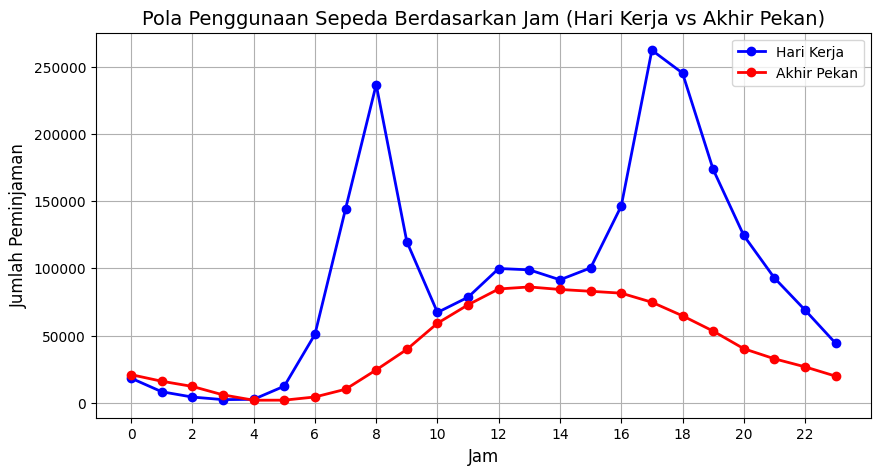

In [ ]:
hourly_usage_df = hour_day_df.groupby(["hr", "workingday_x"]).agg({  # Change 'workingday' to 'workingday_x'
    "cnt_x": "sum"
}).reset_index()

# Pisahkan data hari kerja dan akhir pekan
weekday_usage = hourly_usage_df[hourly_usage_df["workingday_x"] == 1]  # Change 'workingday' to 'workingday_x'
weekend_usage = hourly_usage_df[hourly_usage_df["workingday_x"] == 0]  # Change 'workingday' to 'workingday_x'

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(weekday_usage["hr"], weekday_usage["cnt_x"], marker='o', linewidth=2, color="blue", label="Hari Kerja")
plt.plot(weekend_usage["hr"], weekend_usage["cnt_x"], marker='o', linewidth=2, color="red", label="Akhir Pekan")

# Tambahkan detail ke plot
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.title("Pola Penggunaan Sepeda Berdasarkan Jam (Hari Kerja vs Akhir Pekan)", fontsize=14)
plt.xticks(range(0, 24, 2))
plt.legend()
plt.grid()

plt.show()

Jika jumlah peminjaman lebih tinggi pada jam 7-9 pagi dan 17-19 malam di hari kerja, itu menunjukkan pemakaian untuk perjalanan kerja.
Jika akhir pekan memiliki lonjakan di siang hari, berarti lebih banyak digunakan untuk rekreasi.

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

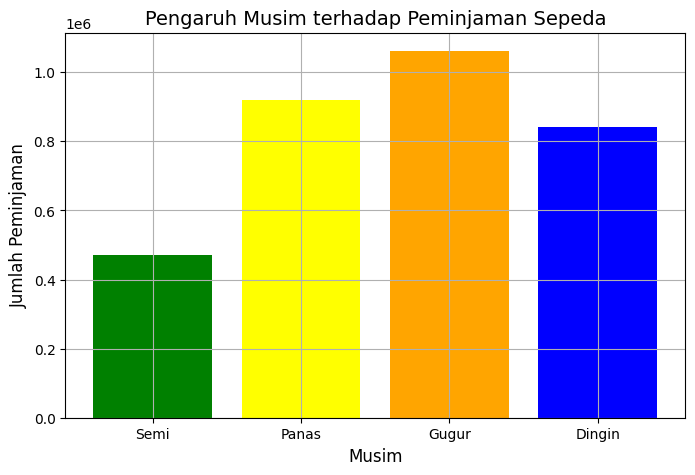

In [ ]:
seasonal_usage_df = hour_day_df.groupby("season_x").agg({
    "cnt_x": "sum"
}).reset_index()

# Mapping angka musim ke nama musim
season_mapping = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
seasonal_usage_df["season_x"] = seasonal_usage_df["season_x"].map(season_mapping)

# Visualisasi
plt.figure(figsize=(8, 5))
plt.bar(seasonal_usage_df["season_x"], seasonal_usage_df["cnt_x"], color=["green", "yellow", "orange", "blue"])

# Tambahkan detail ke plot
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda", fontsize=14)
plt.grid()

plt.show()

Musim gugur mencatat peminjaman sepeda tertinggi, diikuti musim panas dan dingin, sementara musim semi memiliki jumlah terendah. Hal ini mengindikasikan preferensi pengguna yang lebih tinggi pada musim gugur dan panas.

## Analisis Lanjutan (Opsional)

In [ ]:
#Clustering

# Fungsi untuk mengelompokkan jam ke dalam kategori waktu
def categorize_hour(hour):
    if 6 <= hour < 10:
        return "Morning Rush"
    elif 10 <= hour < 16:
        return "Midday Leisure"
    elif 16 <= hour < 20:
        return "Evening Rush"
    else:
        return "Nighttime"
#Clustering

# Fungsi untuk mengelompokkan jam ke dalam kategori waktu
def categorize_hour(hour):
    if 6 <= hour < 10:
        return "Morning Rush"
    elif 10 <= hour < 16:
        return "Midday Leisure"
    elif 16 <= hour < 20:
        return "Evening Rush"
    else:
        return "Nighttime"

# Ubah df menjadi all_df atau Hour_df sesuai kebutuhan Anda
all_df["time_category"] = all_df["hr"].apply(categorize_hour) # Changed df to all_df as 'hr' column is in all_df

# Hitung total peminjaman berdasarkan kategori waktu
# Change 'cnt' to 'cnt_x' as the column from Hour_df is renamed to 'cnt_x' in all_df
time_cluster_df = all_df.groupby("time_category")["cnt_x"].sum().reset_index() # Changed df to all_df

# Urutkan sesuai urutan waktu
time_cluster_df["time_category"] = pd.Categorical(
    time_cluster_df["time_category"],
    categories=["Morning Rush", "Midday Leisure", "Evening Rush", "Nighttime"],
    ordered=True
)

# Sort berdasarkan kategori yang sudah diurutkan
time_cluster_df = time_cluster_df.sort_values("time_category")

# Tampilkan hasil
print(time_cluster_df)
time_cluster_df = all_df.groupby("time_category")["cnt_x"].sum().reset_index() # Changed df to all_df

# Urutkan sesuai urutan waktu
time_cluster_df["time_category"] = pd.Categorical(
    time_cluster_df["time_category"],
    categories=["Morning Rush", "Midday Leisure", "Evening Rush", "Nighttime"],
    ordered=True
)

# Sort berdasarkan kategori yang sudah diurutkan
time_cluster_df = time_cluster_df.sort_values("time_category")

# Tampilkan hasil
print(time_cluster_df)

    time_category    cnt_x
2    Morning Rush   629742
1  Midday Leisure  1005711
0    Evening Rush  1101169
3       Nighttime   556057
    time_category    cnt_x
2    Morning Rush   629742
1  Midday Leisure  1005711
0    Evening Rush  1101169
3       Nighttime   556057


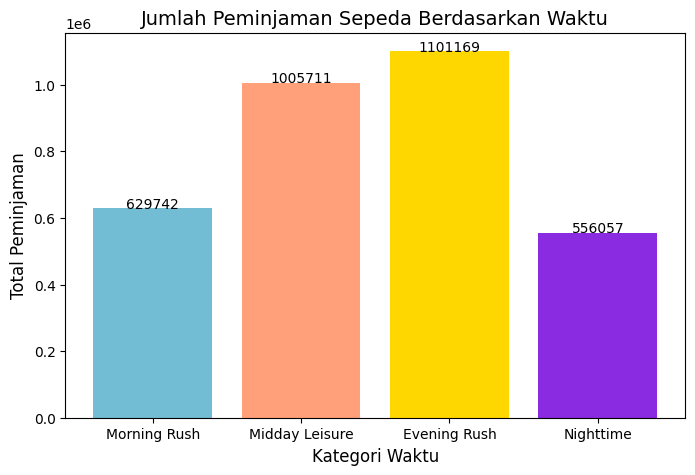

In [ ]:
#Visualisasi Hasil Clustering
# Visualisasi jumlah peminjaman per kategori waktu
plt.figure(figsize=(8, 5))
# Changed time_cluster_df["cnt"] to time_cluster_df["cnt_x"]
plt.bar(time_cluster_df["time_category"], time_cluster_df["cnt_x"], color=['#72BCD4', '#FFA07A', '#FFD700', '#8A2BE2'])

# Judul dan label
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Waktu", fontsize=14)
plt.xlabel("Kategori Waktu", fontsize=12)
plt.ylabel("Total Peminjaman", fontsize=12)

# Tampilkan angka di atas bar
# Changed time_cluster_df["cnt"] to time_cluster_df["cnt_x"]
for i, v in enumerate(time_cluster_df["cnt_x"]):
    plt.text(i, v + 50, str(v), ha="center", fontsize=10)

plt.show()

Hasil clustering berdasarkan kategori waktu peminjaman sepeda menunjukkan bahwa peminjaman tertinggi terjadi pada sore hari (Evening Rush, 16.00 - 20.00) dengan 1.101.169 peminjaman, mengindikasikan bahwa sepeda banyak digunakan sebagai moda transportasi pulang kerja atau aktivitas sore. Siang hari (Midday Leisure, 10.00 - 16.00) mencatat 1.005.711 peminjaman, menunjukkan bahwa sepeda juga populer untuk aktivitas santai atau keperluan harian. Pagi hari (Morning Rush, 06.00 - 10.00) memiliki 629.742 peminjaman, yang kemungkinan besar digunakan untuk perjalanan ke tempat kerja atau sekolah. Sementara itu, malam hari (Nighttime, 20.00 - 06.00) memiliki jumlah peminjaman terendah, yaitu 556.057 kali, yang dapat disebabkan oleh faktor keamanan, berkurangnya mobilitas masyarakat, atau jam operasional layanan sepeda yang lebih terbatas. Secara keseluruhan, tren ini menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi utama pada jam sibuk serta untuk aktivitas siang hari, sementara penggunaan pada malam hari lebih rendah.









In [ ]:
all_df.to_csv("all_data.csv", index=False)

In [ ]:
!conda activate main-ds && pip install streamlit babel

/bin/bash: line 1: conda: command not found


## Conclusion

- Conclution pertanyaan 1:
Pola penggunaan sepeda berbeda antara hari kerja dan akhir pekan. Pada hari kerja, peminjaman sepeda menunjukkan dua puncak utama, yaitu pagi hari sekitar jam 7-9 saat orang berangkat kerja atau sekolah, serta sore hari sekitar jam 17-19 ketika mereka pulang. Di antara kedua waktu tersebut, jumlah peminjaman cenderung lebih rendah. Sebaliknya, pada akhir pekan, pola peminjaman lebih terdistribusi merata sepanjang hari tanpa puncak yang signifikan, di mana jumlah peminjaman meningkat sejak pagi dan tetap stabil hingga sore hari, yang kemungkinan besar mencerminkan aktivitas rekreasi atau perjalanan santai. Hal ini menunjukkan bahwa pada hari kerja, sepeda lebih sering digunakan sebagai alat transportasi untuk keperluan rutin, sedangkan pada akhir pekan, penggunaannya lebih fleksibel dan bersifat rekreasional.
- Conclution pertanyaan 2:
Berdasarkan visualisasi, terlihat bahwa musim gugur memiliki jumlah peminjaman sepeda tertinggi dibandingkan musim lainnya. Hal ini menunjukkan bahwa pengguna lebih cenderung menggunakan sepeda pada musim tersebut. Musim panas menempati posisi kedua, kemungkinan karena cuaca yang mendukung aktivitas bersepeda. Sementara itu, meskipun berada di bawah musim gugur dan panas, musim dingin masih memiliki jumlah peminjaman yang cukup tinggi. Di sisi lain, musim semi mencatat jumlah peminjaman terendah, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung atau preferensi pengguna yang lebih memilih bersepeda di musim lainnya. Untuk memahami lebih dalam faktor-faktor yang memengaruhi pola ini, analisis tambahan seperti kondisi cuaca spesifik atau hari libur dapat dilakukan.

In [ ]:
import pandas as pd

df = pd.read_csv("all_data.csv")  # Sesuaikan dengan nama file
print(df.head())  # Cek beberapa baris awal
print(df.info())  # Cek tipe data tiap kolom


   instant_x      dteday  season_x  yr_x  mnth_x  hr  holiday_x  weekday_x  \
0          1  2011-01-01         1     0       1   0          0          6   
1          2  2011-01-01         1     0       1   1          0          6   
2          3  2011-01-01         1     0       1   2          0          6   
3          4  2011-01-01         1     0       1   3          0          6   
4          5  2011-01-01         1     0       1   4          0          6   

   workingday_x  weathersit_x  ...  workingday_y  weathersit_y    temp_y  \
0             0             1  ...             0             2  0.344167   
1             0             1  ...             0             2  0.344167   
2             0             1  ...             0             2  0.344167   
3             0             1  ...             0             2  0.344167   
4             0             1  ...             0             2  0.344167   

    atemp_y     hum_y  windspeed_y  casual_y  registered_y  cnt_y  \
0  0.